In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
import cmocean.cm as cmo
import scipy.stats as st

In [2]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .25
mpl.rcParams['figure.subplot.top']    = .85
mpl.rcParams['figure.subplot.left']   = .1
mpl.rcParams['figure.subplot.right']  = .8
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,2.5

In [3]:
var = ['sterodyn.','glacier','Gr. SMB','Ant. SMB','Ant. dyn.']
ar5r = np.array(
    [[1,0,1,1,0],
    [0,1,0,0,0],
    [1,0,1,1,0],
    [1,0,1,1,0],
    [0,0,0,0,1]])
ar5g = {}
ar5g['rcp45'] = np.array(
    [[1,.68,.68,-.57,-.05],
    [.68,1,.43,-.43,-.05],
    [.68,.43,1,-.43,-.05],
    [-.57,-.43,-.43,1,.18],
    [-.05,-.05,-.05,.18,1]])
ar5g['rcp85'] = np.array(
    [[1,.57,.57,-.57,-.05],
    [.57,1,.18,-.33,-.05],
    [.57,.18,1,-.33,-.05],
    [-.57,-.33,-.33,1,.18],
    [-.05,-.05,-.05,.18,1]])

In [4]:
def corr(ds,var1,var2):
    if var1 == var2:
        return 1
    else:
        cor = st.spearmanr(ds[var1].values.flatten(),ds[var2].values.flatten())[0]
        print(var1,var2,cor)
        return cor

In [5]:
vvar = ['stdn','glac','gsmb','asmb','adyn']
this = {}
for scen in ['rcp45','rcp85']:
    ds = xr.open_dataset(f'../data/ensemble_glob_{scen}.nc')
    
    this[scen] = np.zeros((len(vvar),len(vvar)))
    for v1,var1 in enumerate(vvar):
        for v2,var2 in enumerate(vvar):
            this[scen][v1,v2] = corr(ds,var1,var2)

    ds.close()

stdn glac 0.28762404628312505
stdn gsmb 0.5829709443551384
stdn asmb 0.05169552071324878
stdn adyn -0.13340580120473147
glac stdn 0.28762404628312505
glac gsmb 0.42127236555366343
glac asmb -0.019120332355225443
glac adyn -0.05738226005153301
gsmb stdn 0.5829709443551384
gsmb glac 0.42127236555366343
gsmb asmb 0.0024768596307230824
gsmb adyn -0.1620246272366542
asmb stdn 0.05169552071324878
asmb glac -0.019120332355225443
asmb gsmb 0.0024768596307230824
asmb adyn 0.03404802359864771
adyn stdn -0.13340580120473147
adyn glac -0.05738226005153301
adyn gsmb -0.1620246272366542
adyn asmb 0.03404802359864771
stdn glac 0.28085360253353947
stdn gsmb 0.5315707451453436
stdn asmb 0.11260441599975565
stdn adyn -0.05725602941165237
glac stdn 0.2808536025335395
glac gsmb 0.4296210573868369
glac asmb -0.026615847398755964
glac adyn 0.009490294929450768
gsmb stdn 0.5315707451453436
gsmb glac 0.4296210573868369
gsmb asmb 0.08990780243109454
gsmb adyn -0.11297523839844527
asmb stdn 0.11260441599975565


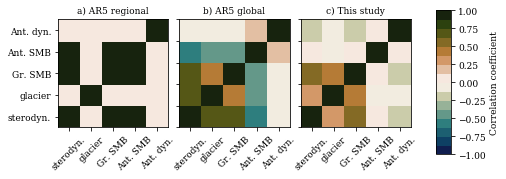

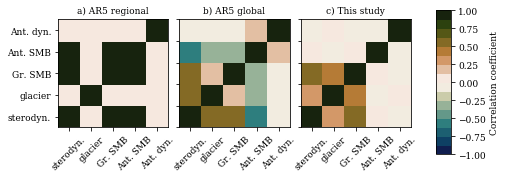

In [6]:
cmap = plt.get_cmap('cmo.tarn_r',16)
x = np.arange(0,6)
    
for s,scen in enumerate(['rcp45','rcp85']):
    fig = plt.figure()
    
    ax = fig.add_subplot(1,3,1)
    im = ax.pcolormesh(x,x,ar5r,cmap=cmap,vmin=-1,vmax=1)
    ax.set_title('a) AR5 regional')
    ax.set_xticks(x+.5)
    ax.set_xticklabels(var,rotation=45)
    ax.set_yticks(x+.5)
    ax.set_yticklabels(var)
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    
    ax = fig.add_subplot(1,3,2)
    im = ax.pcolormesh(x,x,ar5g[scen],cmap=cmap,vmin=-1,vmax=1)
    ax.set_title('b) AR5 global')
    ax.set_xticks(x+.5)
    ax.set_xticklabels(var,rotation=45)
    ax.set_yticklabels([])
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    
    ax = fig.add_subplot(1,3,3)
    im = ax.pcolormesh(x,x,this[scen],cmap=cmap,vmin=-1,vmax=1)
    ax.set_title('c) This study')
    ax.set_xticks(x+.5)
    ax.set_xticklabels(var,rotation=45)
    ax.set_yticklabels([])
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    
    cax = fig.add_axes([.85,.1,.03,.8])
    cb = plt.colorbar(im,cax=cax)
    cb.set_label('Correlation coefficient')
    
    figname = f'draftplot_correlations_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()      